In [3]:
import requests
from bs4 import BeautifulSoup
import time
import random
import pandas as pd

In [4]:
df = pd.read_excel("Data/로또.xlsx")
df

,1번째,2번째,3번째,4번째,5번째,6번째,보너스
0,10,23,29,33,37,40,16
1,9,13,21,25,32,42,2
2,11,16,19,21,27,31,30
3,14,27,30,31,40,42,2
4,16,24,29,40,41,42,3
...,...,...,...,...,...,...,...
1155,30,31,34,39,41,45,7
1156,5,7,12,20,25,26,28
1157,21,25,27,32,37,38,20
1158,3,9,27,28,38,39,7


In [9]:
# 1. 로또 번호별 출현횟수
total = []
for n in range(1,46):
    count = 0
    for i in range(len(df)):
        row = df.iloc[i].values
        if n in row:
            count += 1
    total.append([n,count])

result = pd.DataFrame(total, columns = ["번호", "출현횟수"])
result

,번호,출현횟수
0,1,191
1,2,179
2,3,188
3,4,187
4,5,170
5,6,187
6,7,189
7,8,171
8,9,149
9,10,182


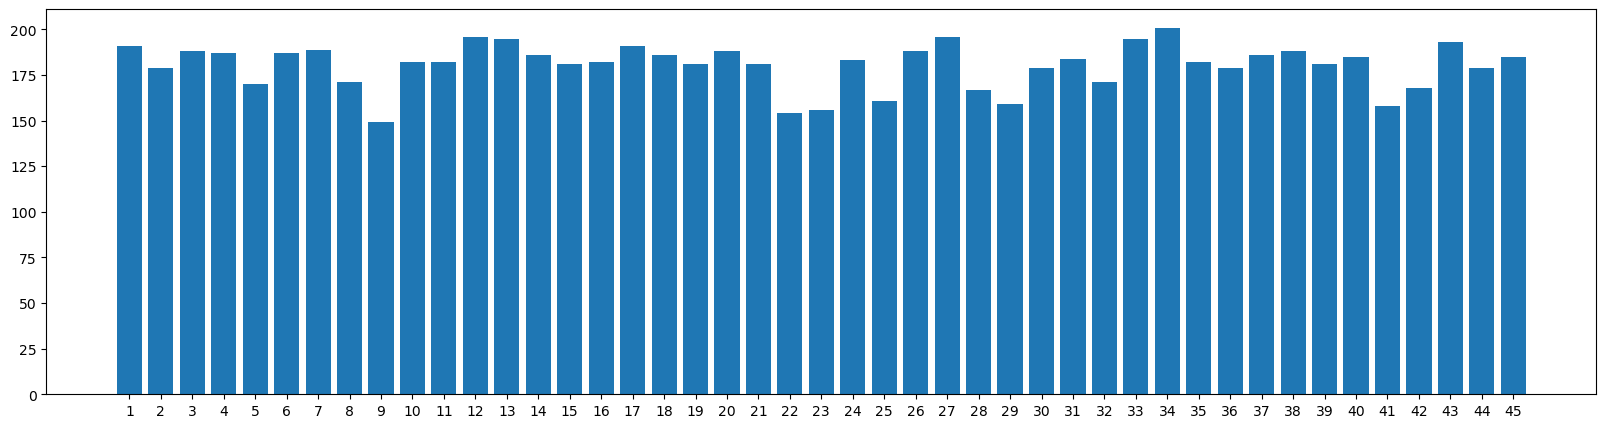

In [16]:
import seaborn as ss
import matplotlib.pyplot as plt

plt.figure(figsize = (20, 5))
plt.bar(result["번호"], result["출현횟수"])
plt.xticks(range(1,46))
plt.show()

In [26]:
# 2. 
total=[]
for i in range(len(df)):
    row = df.iloc[i].values
    total.append(row)

total

[array([10, 23, 29, 33, 37, 40, 16], dtype=int64),
 array([ 9, 13, 21, 25, 32, 42,  2], dtype=int64),
 array([11, 16, 19, 21, 27, 31, 30], dtype=int64),
 array([14, 27, 30, 31, 40, 42,  2], dtype=int64),
 array([16, 24, 29, 40, 41, 42,  3], dtype=int64),
 array([14, 15, 26, 27, 40, 42, 34], dtype=int64),
 array([ 2,  9, 16, 25, 26, 40, 42], dtype=int64),
 array([ 8, 19, 25, 34, 37, 39,  9], dtype=int64),
 array([ 2,  4, 16, 17, 36, 39, 14], dtype=int64),
 array([ 9, 25, 30, 33, 41, 44,  6], dtype=int64),
 array([ 1,  7, 36, 37, 41, 42, 14], dtype=int64),
 array([ 2, 11, 21, 25, 39, 45, 44], dtype=int64),
 array([22, 23, 25, 37, 38, 42, 26], dtype=int64),
 array([ 2,  6, 12, 31, 33, 40, 15], dtype=int64),
 array([ 3,  4, 16, 30, 31, 37, 13], dtype=int64),
 array([ 6,  7, 24, 37, 38, 40, 33], dtype=int64),
 array([ 3,  4,  9, 17, 32, 37,  1], dtype=int64),
 array([ 3, 12, 13, 19, 32, 35, 29], dtype=int64),
 array([ 6, 30, 38, 39, 40, 43, 26], dtype=int64),
 array([10, 14, 18, 20, 23, 30,

In [27]:
box = []
for n in range(1, 46):
    count = 0
    for i in total[::-1]:
        if n not in i:
            count += 1
        else:
            break
    box.append([n, count])
    
box.sort(key = lambda x : x[1], reverse = True)

text = f"{len(df)}회 기준 번호별 미출기간\n\n"

for i in box:
    text += f"{i[0]}번 : {i[1]}주 연속 미출현\n"

f = open("번호별 미출기간.txt", 'wt')
f.write(text)
f.close()

In [30]:
# 3. 한번도 나오지 않았던 5등 조합
box = []
for n1 in range(1, 46):
    for n2 in range(n1+1, 46):
        for n3 in range(n2+1, 46):
            count = 0
            for i in total:
                if n1 in i[:6]  and n2 in i[:6] and n3 in i[:6]:
                    break
                else:
                    count += 1
            if count == len(total):
                box.append([n1,n2,n3])
box

[[1, 2, 32],
 [1, 2, 41],
 [1, 2, 43],
 [1, 3, 5],
 [1, 3, 13],
 [1, 3, 19],
 [1, 3, 38],
 [1, 4, 7],
 [1, 4, 11],
 [1, 4, 21],
 [1, 4, 22],
 [1, 4, 24],
 [1, 4, 25],
 [1, 4, 27],
 [1, 4, 30],
 [1, 4, 32],
 [1, 4, 36],
 [1, 4, 44],
 [1, 5, 7],
 [1, 5, 15],
 [1, 5, 17],
 [1, 5, 22],
 [1, 5, 43],
 [1, 5, 45],
 [1, 6, 7],
 [1, 6, 8],
 [1, 6, 10],
 [1, 6, 18],
 [1, 6, 23],
 [1, 6, 26],
 [1, 6, 29],
 [1, 6, 30],
 [1, 6, 32],
 [1, 6, 35],
 [1, 6, 43],
 [1, 6, 44],
 [1, 7, 13],
 [1, 7, 17],
 [1, 7, 25],
 [1, 7, 28],
 [1, 7, 29],
 [1, 7, 31],
 [1, 7, 39],
 [1, 7, 43],
 [1, 7, 44],
 [1, 7, 45],
 [1, 8, 20],
 [1, 8, 25],
 [1, 8, 30],
 [1, 8, 40],
 [1, 8, 41],
 [1, 9, 15],
 [1, 9, 22],
 [1, 9, 34],
 [1, 9, 37],
 [1, 10, 11],
 [1, 10, 30],
 [1, 10, 34],
 [1, 10, 39],
 [1, 11, 19],
 [1, 11, 20],
 [1, 11, 29],
 [1, 11, 31],
 [1, 11, 33],
 [1, 11, 41],
 [1, 11, 43],
 [1, 12, 25],
 [1, 12, 30],
 [1, 12, 31],
 [1, 13, 15],
 [1, 13, 23],
 [1, 13, 27],
 [1, 13, 30],
 [1, 13, 31],
 [1, 13, 41],
 [1, 14, 1

In [31]:
len(box)

2681